# Hypothesis:
# I think that there are more students who are non computer science majors/minors in the class than students who are computer science majors/minors. If there are, I will look for the most popular major among the non computer science majors. 

In [1]:
%reload_ext autoreload
%autoreload 2

I will first convert the given csv file to a column-oriented table. 

In [2]:
from data_utils import read_csv_rows
from data_utils import columnar

data_rows: list[dict[ str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)


Then I plan to isolate the row numbers, the primary majors, and if the student plans to major/minor in computer science.

In [9]:
from data_utils import head
from data_utils import select
from tabulate import tabulate

selected_data: dict[str, list[str]] = select(columns, ["row_number", "primary_major", "comp_major"])

tabulate(head(selected_data, 10), selected_data.keys(), "html")

row_number,primary_major,comp_major
0,Advertising and Public Relations,No
1,Anthropology,No
2,Biology,No
3,Biology,No
4,Biology,No
5,Biology,No
6,Biology,No
7,Biology,No
8,Biology,No
9,Biology,No


After this, I plan to count how many computer science majors and computer science minors there are in the class. I will also count how many students are not going to get some sort of degree in computer science.

In [4]:
from data_utils import count

major_counts: dict[str, int] = count(selected_data["primary_major"])
print(f"primary_majors: {major_counts}")

comp_counts: dict[str, int] = count(selected_data["comp_major"])
print(f"comp_majors: {comp_counts}")

major = comp_counts["Yes - BS"] + comp_counts["Yes - BA"] + comp_counts["Yes - Minor"]
non_major = comp_counts["No"]
print(f"Number of computer science majors and minors: {major}")
print(f"Number of non computer science majors: {non_major} ")

primary_majors: {'Advertising and Public Relations': 1, 'Anthropology': 1, 'Biology': 59, 'Biostatistics': 6, 'Biostatistics ': 5, 'Business': 51, 'Chemistry': 5, 'Communications': 3, 'Computer Science': 119, 'Economics': 42, 'English': 3, 'Environmental Science': 14, 'Environmental Science ': 8, 'Exercise and Sports Science': 7, 'Geology': 1, 'Global Studies': 1, 'Health Policy and Management': 3, 'History': 3, 'Information Science': 14, 'Information science': 1, 'Information Science ': 4, 'Journalism': 6, 'Math': 7, 'Math ': 12, 'Neuroscience': 33, 'Neuroscience ': 15, 'Nursing': 2, 'Nutrition': 2, 'Peace, War, and Defense': 5, 'Physics': 4, 'Political Science': 5, 'Psychology': 38, 'Psychology ': 37, 'Public Health': 3, 'Public Policy': 4, 'Sociology': 1, 'Spanish': 1, 'Statistics': 8, 'Statistics ': 21, 'Undecided': 18}
comp_majors: {'No': 404, 'Yes - Minor': 33, 'Yes - BS': 88, 'Yes - BA': 48}
Number of computer science majors and minors: 169
Number of non-computer science majors:

I will create two graphs that will show the comparison between the number of non computer science majors with computer science majors/minors as well as a comparison of the number of different primary majors in the class.

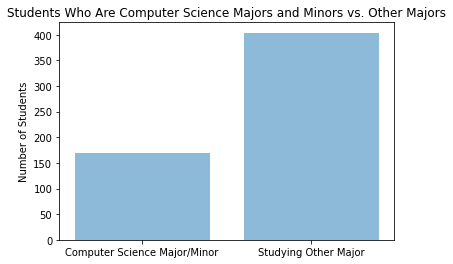

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

labels = ['Computer Science Major/Minor', 'Studying Other Major']
y_pos = [0, 1]  # the order the labels will be arranged in bar chart
performance = [169, 404]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Number of Students')
plt.title('Students Who Are Computer Science Majors and Minors vs. Other Majors')

plt.show()

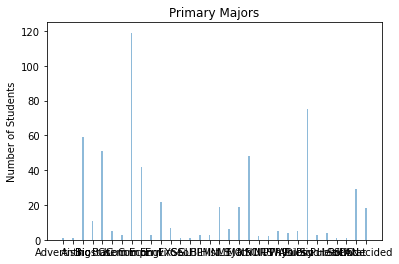

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

labels = ['Advertising', 'Anth', 'Bio', 'Biostat', 'Busi', 'Chem', 'Comm', 'Comp', 'Econ', 'Engl', 'Enviro', 'EXSS', 'Geol', 'GLBL', 'HPM', 'Hist', 'INLS', 'MEJO', 'Math', 'NSCI', 'NURS', 'NUTR', 'PWAD', 'Physics', 'PoliSci', 'Psyc', 'Public Health', 'PubPol', 'Soci', 'SPAN', 'Stat', 'Undecided']
y_pos = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155]  # the order the labels will be arranged in bar chart
performance = [1, 1, 59, 11, 51, 5, 3, 119, 42, 3, 22, 7, 1, 1, 3, 3, 19, 6, 19, 48, 2, 2, 5, 4, 5, 75, 3, 4, 1, 1, 29, 18]

plt.bar(y_pos, performance, align='center', alpha= 0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Number of Students')
plt.title('Primary Majors')

plt.show()

After this, I will compare the number of non computer science majors with number of computer science majors and minors. If the number of non computer science majors is larger, I will find out the next most popular major in the class. 

In [7]:
comparison: bool = non_major > major 
comparison_statement: str = (f"There are more non computer science majors than computer science majors and minors combined: {comparison}")
print(comparison_statement)

There are more non computer science majors than computer science majors and minors combined: True


Since we have seen that there are more students in this class who are not studying computer science as a major or minor, I will look to find the next popular major among the students. 

In [8]:

from data_utils import helper

majors: dict[str, list[str]] = helper(data_rows)

print(f"The first and second popular majors are :{majors}")

The first and second popular majors are :{'First Popular Major': ['Computer Science'], 'Second Popular Major': ['Biology']}


# Conclusion: 

Through these results, we are able to see that computer science is the most popular major students choose in the class, but there are many more students who are different majors such as biology, statisitcs, business, and neuroscience. Many majors require that students take COMP 110 even if they are not planning to major or minor in computer science, which could be why several non computer science majors/minors are in the class. There can also be a number of students who want to take one course of computer science to see if they like it and then add a major or minor in the subject. There are students who are studying topics like English, which does not require computer science for the degree. Even if it is not required, they still find taking the class useful. One flaw that skewed the data was that several keys in the dictionary for primary majors were repeated. Majors such as math, psychology, and neuroscience were repeated. When I was creating the graph for the primary majors, I noticed that psychology was the one that was the most prominent major among the students not studying computer science. Through more data cleaning, we will be able to get the outcome that psychology was the most popular major with the helper function that I wrote instead of biology. It can be noted that they may find the skills they learn in this class useful for their future careers. 